In [ ]:
# CELL 6: identification accuracy vs K (split-half vectors and top-K edges)
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


v1 = Z1_arr[:, iu[0], iu[1]]
v2 = Z2_arr[:, iu[0], iu[1]]

Ks = [10, 20, 50, 100, 200, 500, 1000, 2000, n_edges]
results = []
for K in Ks:
    idx = order[:K]  # top-K by ICC
    A = v1[:, idx]
    B = v2[:, idx]
    sim = cosine_similarity(A, B)
    preds = sim.argmax(axis=1)
    acc = (preds == np.arange(A.shape[0])).mean()
    results.append((K, acc))
    print(f"K={K:5d}  accuracy={acc:.3f}")


import pandas as pd
df_curve = pd.DataFrame(results, columns=['K','accuracy'])
df_curve.to_csv(os.path.join(RESULTS_DIR,'accuracy_vs_K_topICC.csv'), index=False)
print("Saved accuracy vs K results.")


K=   10  accuracy=0.867
K=   20  accuracy=0.967
K=   50  accuracy=1.000
K=  100  accuracy=0.967
K=  200  accuracy=1.000
K=  500  accuracy=1.000
K= 1000  accuracy=1.000
K= 2000  accuracy=1.000
K=19900  accuracy=1.000
Saved accuracy vs K results.


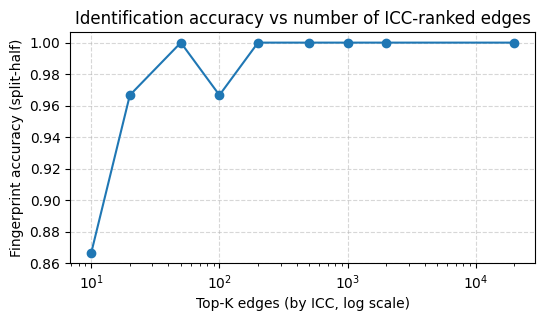

Saved plot to results.


In [ ]:
# CELL 7: plot
import matplotlib.pyplot as plt, pandas as pd
df = pd.read_csv(os.path.join(RESULTS_DIR,'accuracy_vs_K_topICC.csv'))
plt.figure(figsize=(6,3))
plt.plot(df['K'], df['accuracy'], marker='o')
plt.xscale('log')
plt.xlabel('Top-K edges (by ICC, log scale)')
plt.ylabel('Fingerprint accuracy (split-half)')
plt.title('Identification accuracy vs number of ICC-ranked edges')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(os.path.join(RESULTS_DIR,'accuracy_vs_K_plot.png'), dpi=150, bbox_inches='tight')
plt.show()
print("Saved plot to results.")
